# ORF307 Homework 4 {-}
Due: Friday, February 25, 2021 9:00 pm ET

- Please export your code with output as pdf.
- If there is any additional answers, please combine them as **ONE** pdf file before submitting to the Gradescope. Gradescope.

# Q1 Fitting a line with different norms {-}

Import the file `HW4Q1.csv` using the following lines of code, you might have to change `HW4Q1.csv` to the corresponding filepath on your machine/Google Drive:

In [2]:
import pandas as pd
import numpy as np
# df = pd.read_csv('/content/drive/MyDrive/HW4Q1.csv')
df = pd.read_csv('HW4Q1.csv')
y = df['y'].values
t = df['t'].values

This will generate two vectors $y,t \in {\mathbf{R}}^{42}$. We are interested in fitting a linear function 
$$f(t) = \alpha + \beta t,$$ 
through the points $(t_i, y_i)$, *i.e.*, we want to select $\alpha$ and $\beta$ such that $f(t_i) \approx y_i, i = 1,\dots, 42$.
We can caluclate $\alpha$ and $\beta$ by optimizing the following three criteria.

(a) *Least-squares:* select $\alpha$ and $\beta$ by minimizing $$\sum_{i=1}^{42} (y_i - \alpha - \beta t_i)^2.$$

(b) $\ell_1$*-norm approximation:* select $\alpha$ and $\beta$ by minimizing $$ \sum_{i=1}^{42} \lvert y_i - \alpha - \beta t_i \rvert.$$

(c) $\ell_\infty$*-norm approximation:* select $\alpha$ and $\beta$ by minimizing $$ \max_{i=1,\dots,42} \lvert y_i - \alpha - \beta t_i \rvert.$$

Find the optimal values of $\alpha$ and $\beta$ for each of the three optimization criteria. This yields three linear functions $f_{\rm ls}(t), f_{\ell_1}(t), f_{\ell_\infty}$. Plot the 42 data points, and the three functions $f$. What do you observe?

# Q2 Linear programs with absolute values {-}

Consider the problem

$$
\begin{array}{ll}\tag{1}
\mbox{minimize} &2x_1 + 3 \lvert x_2 - 10 \rvert\\
\text{subject to} &\lvert x_1 + 2 \rvert + \lvert x_2 \rvert \le 5,
\end{array}
$$

(a) Reformulate this as a linear program.

(b) Reformulate this as a linear program in standard form.

(c) Solve problem (1) graphically.

# Q3 Optimal Illumination {-}

We consider an illumination system of m lamps, at positions $l_1, . . . , l_m \in {\mathbf{R}}^2$
, illuminating n flat patches.

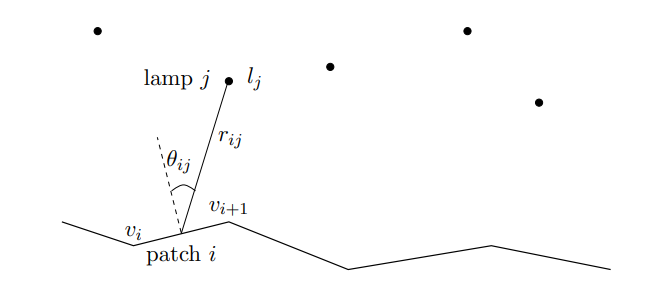




The patches are line segments; the ith patch is given by $[v_i
, v_{i+1}]$ where $v_1, \dots , v_{n+1} \in \mathbf{R}^2$. The variables in the problem are the lamp powers $p_1, \dots , p_m$, which can vary between 0 and 1. The illumination at (the midpoint of) patch $i$ is denoted $I_i$. We will use a simple model for the illumination:

$$ I_i = \sum_{j=1}^m a_{ij} p_j, \qquad a_{ij} = r_{ij}^{-2} \max\{\cos \theta_{ij},0 \},$$

where $r_{ij}$ denotes the distance between lamp $j$ and the midpoint of patch $i$, and $θ_{ij}$ denotes the angle between the upward normal of patch $i$ and the vector from the midpoint of patch $i$ to lamp $j$, as shown in the figure. This model takes into account “self-shading” (*i.e.*, the fact that a patch is illuminated only by lamps in the halfspace it faces) but not shading of
one patch caused by another. Of course we could use a more complex illumination model, including shading and even reflections. This just changes the matrix relating the lamp powers to the patch illumination levels.

The problem is to determine lamp powers that make the illumination levels close to a given desired illumination level $I_{\rm des}$, subject to the power limits $0 \le p_i \le 1$.

(a) Suppose we use the maximum deviation $$\phi(p) = \max_{k=1,\dots,n} \lvert I_k - I_{\rm des}\rvert$$ as a measure for the deviation from the desired illumination level. Formulate the illumination problem using this criterion as a linear optimization problem.

(b) There are several suboptimal approaches based on weighted least-squares. You are given $A$ (where the entries of $A$ are $a_{ij}$ in the model for illumination) and $I_{\rm des}$. Import the file `HW4Q3.csv` using the following lines of code, you might have to change `HW4Q3.csv` to the corresponding filepath on your machine/Google Drive

In [3]:
# A_pd = pd.read_csv('/content/drive/MyDrive/HW4Q3.csv', header=None)
A_pd = pd.read_csv('HW4Q3.csv', header=None)
A = A_pd.to_numpy()
I_des = 2

We consider two examples.

1. *Saturated least-squares.* We can solve the least-squares problem
$$ \mbox{minimize}\quad \sum_{k=1}^n (I_k − I_{\rm des})^2$$ 

ignoring the constraints. If the solution is not feasible, we saturate it, *i.e.*, set $p_j = 0$ if $p_j \le 0$ and $p_j = 1$ if $p_j \ge 1$. Compute a feasible $p$ using this first method, and calculate $\phi(p)$.

2. *Weighted least-squares.* We consider another least-squares problem:
$$ \mbox{minimize}\quad  \sum_{k=1}^n (I_k − I_{\rm des})^2 + \mu \sum_{i=1}^m (p_i - 0.5)^2,$$ 

where $\mu \ge 0$ is used to attach a cost to a deviation of the powers from the value 0.5, which lies in the middle of the power limits. For large enough $\mu$, the solution of this problem will satisfy $0 \le \pi \le 1$, *i.e.*, be feasible for the original problem. Again, using the same $A$ and $I_{\rm des}$, find the smallest $\mu$ such that $p$ becomes feasible, and evaluate $\phi(p)$.

(c) Using the same data as in part (b), solve the LP you derived in part (a). Compare the solution with the solutions you obtained using the (weighted) least-squares methods of part (b).
